In [1]:
# Romain Puech, 2025
# 2025-01-22 -- presentation to climate subgroup

# 0 Rules doc
# 1 Show ignition map
# 2 Show scenario from this ignition map
# 3 Show burn map
# 4 Show Routing video
# 5 Show benchmarking results
# 6 Show optimization

# Talk about the new formulations

Game specifications: https://www.overleaf.com/project/67898fa11aa3af8abd3d4e14

In [11]:
import numpy as np
import time
from matplotlib import pyplot as plt

from displays import display_grid, save_grid_image, create_video_from_images, create_scenario_video
from simulations import propagate_wildfire, propagate_smoke, propagate_smoke_parallel, propagate_smoke_parallel2, run_simulation, generate_scenario, load_ignition_map, plot_ignition_map,generate_ignition_map, save_ignition_map, load_scenario,save_scenario, load_scenario_jpg
from Drone import Drone
from benchmark import run_benchmark_scenario, run_benchmark_scenarii, run_benchmark_scenarii_sequential
from RoutingStrategy import RoutingStrategy, GroundPlacementStrategy, LoggedGroundPlacementStrategy, reset_count

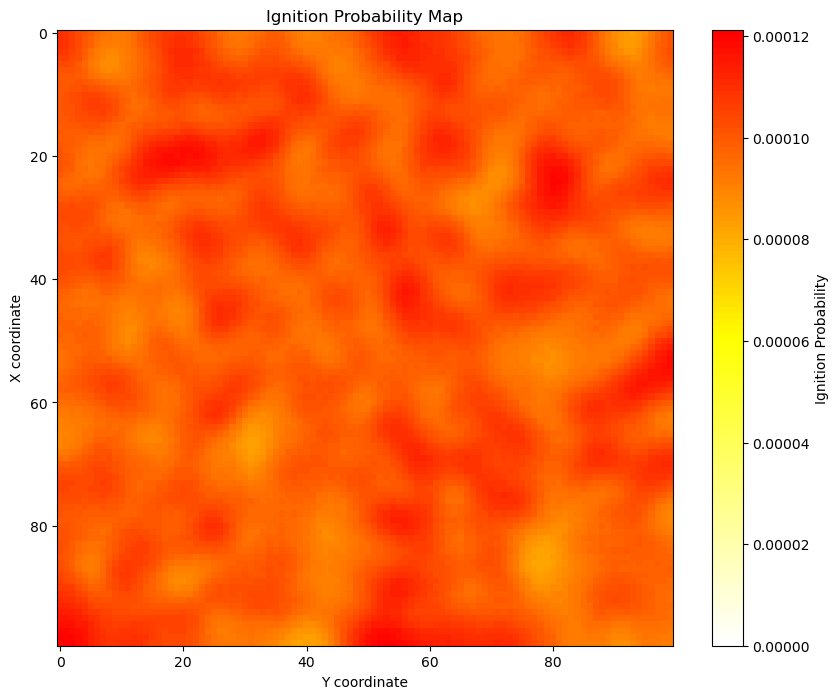

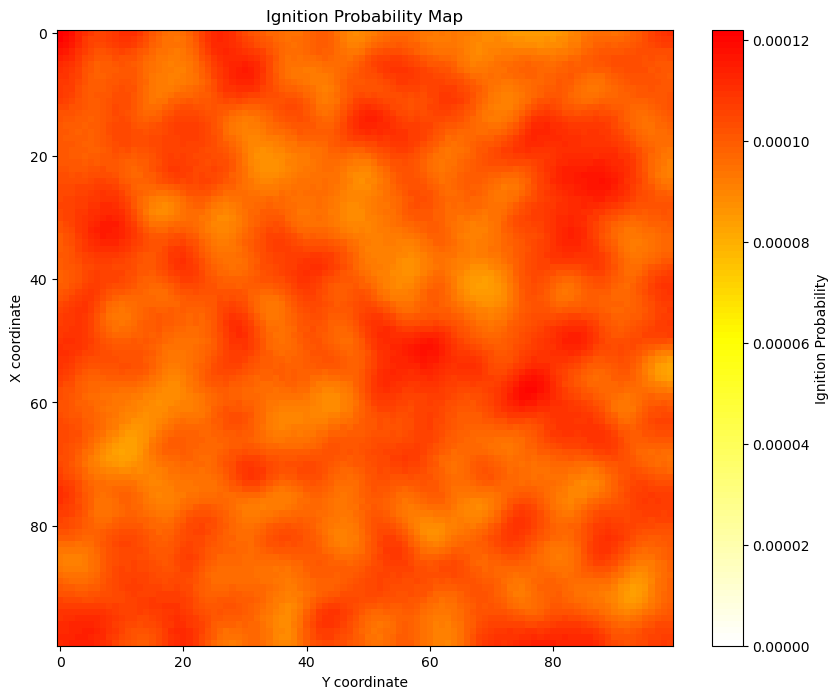

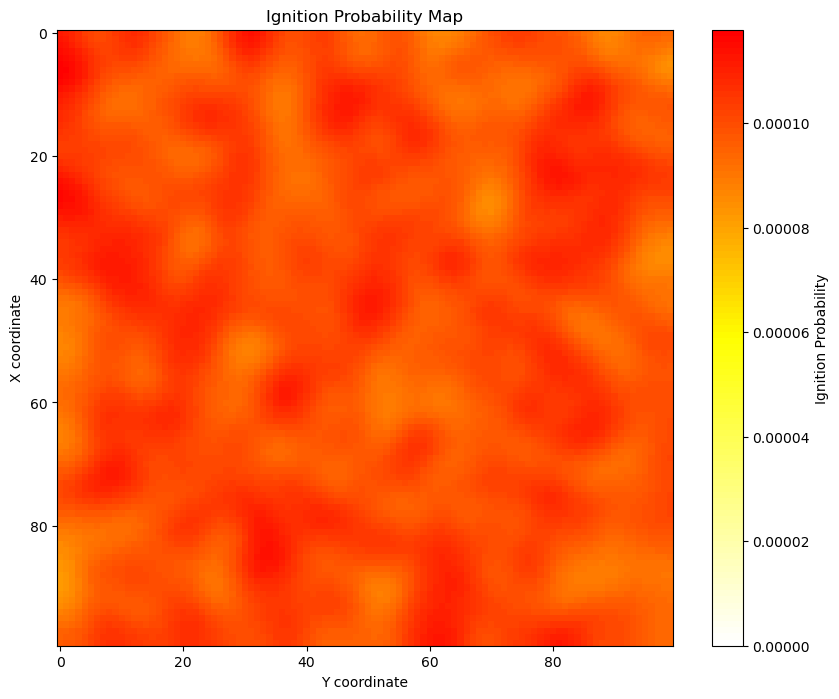

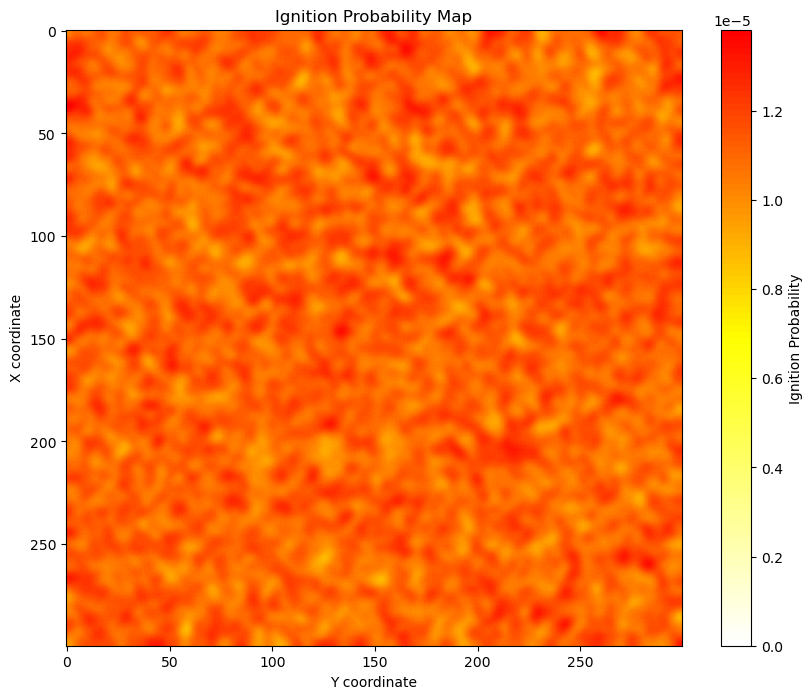

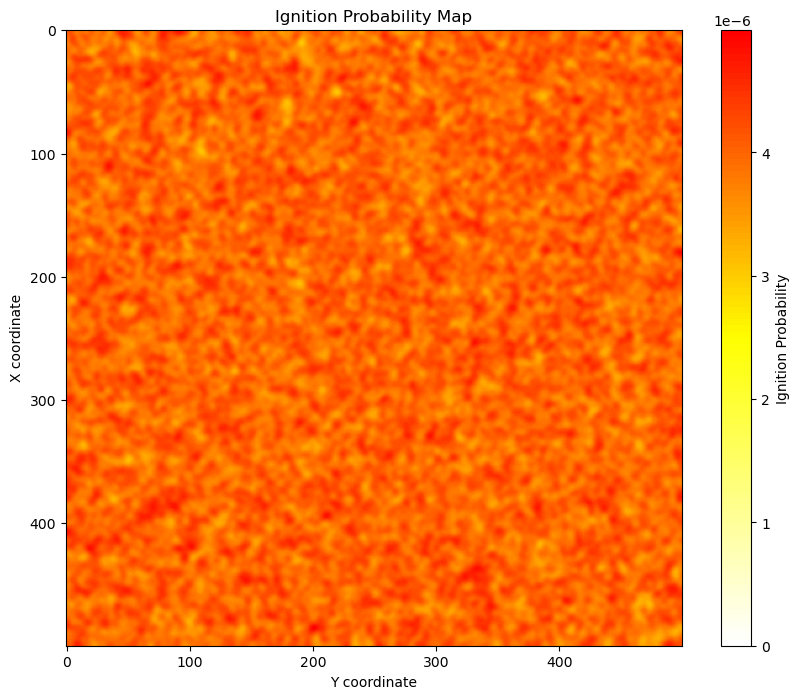

In [3]:
# 1. Ignition maps

for i in range(1,6):
    plot_ignition_map(load_ignition_map(f"./ignition_maps/ignition_map{i}.txt"))

In [4]:
# 2. Scenarios for ignition map

scenario, starting_time = load_scenario("ignition1/scenario0.txt")
create_scenario_video(scenario)

# show video

Video saved at: display_simulation/simulation.mp4
Video saved as simulation.mp4


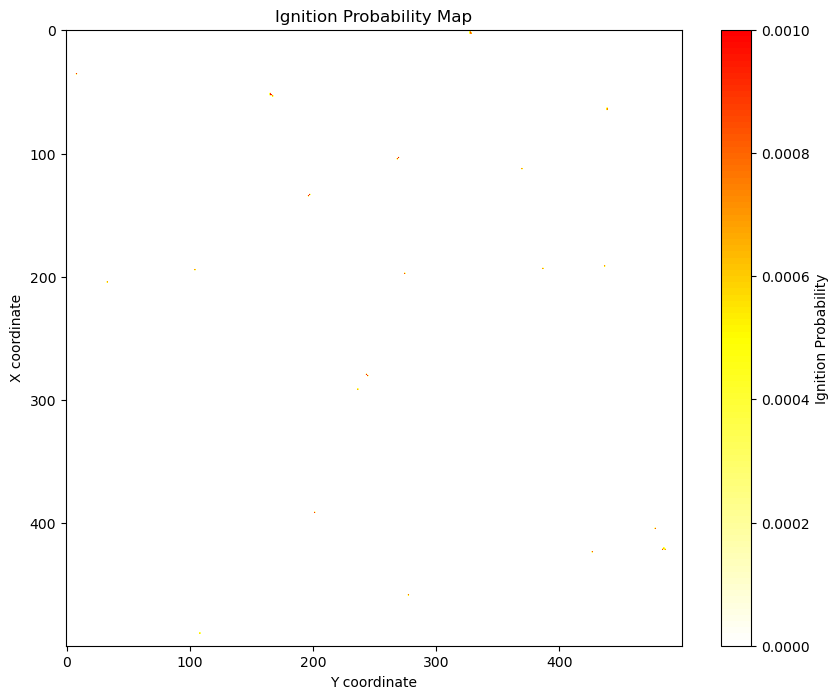

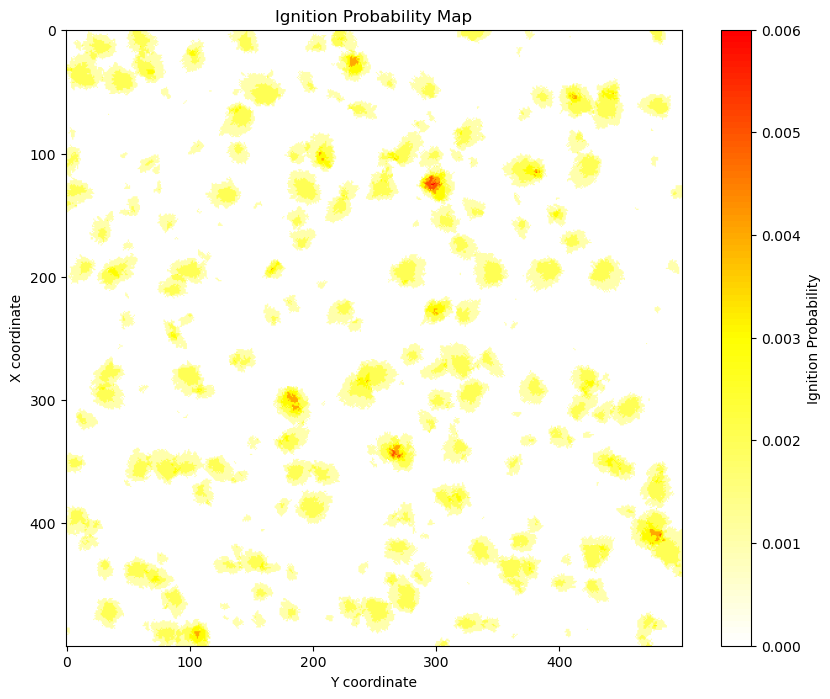

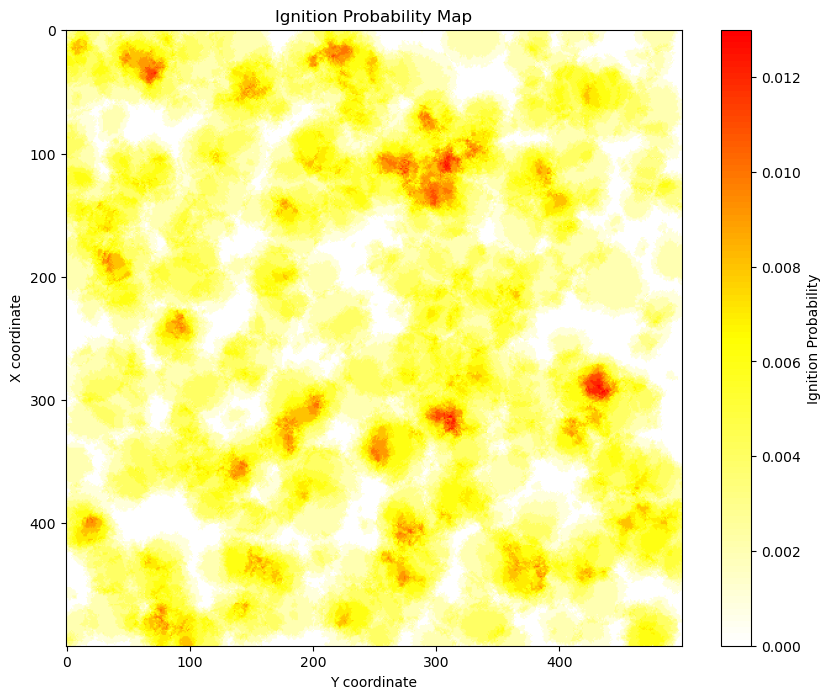

In [5]:
# 3. Burn maps

# Average all scenarios in burn maps

bdir = 'burn_maps'
bm, _ = load_scenario(f"{bdir}/burn_map_5")

plot_ignition_map(bm[1])
plot_ignition_map(bm[30])
plot_ignition_map(bm[60])

# Show burn map 5 video

In [8]:
# 4. Routing

scenario, starting_time = load_scenario('./ignition1/scenario0.txt')
start = time.time()
delta , device , (position_history, ground, charging) = run_benchmark_scenario(scenario,starting_time,GroundPlacementStrategy,RoutingStrategy,(20,20,100), (10,), return_history=True)
print(time.time() - start)
print(f"{delta=}, {device=}, {starting_time=}, {len(position_history)=}")

create_scenario_video(scenario[:len(position_history)],drone_locations_history=position_history,starting_time=starting_time,out_filename='test_simulation', ground_sensor_locations = ground, charging_stations_locations = charging)

0.0011341571807861328
delta=7, device='drone', starting_time=51, len(position_history)=59
Video saved at: display_test_simulation/test_simulation.mp4
Video saved as test_simulation.mp4


In [9]:
# Full benchmark (about 1 minute to run)

start = time.time()
run_benchmark_scenarii('ignition2/',GroundPlacementStrategy,RoutingStrategy,(10,10,100), (10,))
print(time.time() - start)

  0%|          | 0/1000 [00:00<?, ?it/s]


NameError: name 'jl' is not defined

In [12]:
# benchmark againt optimization strategy

reset_count()
start = time.time()
run_benchmark_scenarii_sequential('ignition1/',LoggedGroundPlacementStrategy,RoutingStrategy,("optimized_locations_1.json",), (0,), max_n_scenarii=50)
print(time.time() - start)

reset_count()
start = time.time()
run_benchmark_scenarii_sequential('ignition1/',GroundPlacementStrategy,RoutingStrategy,(10,10,100), (0,), max_n_scenarii=200)
print(time.time() - start)


print("----layout 2----")

reset_count()
start = time.time()
run_benchmark_scenarii_sequential('ignition2/',LoggedGroundPlacementStrategy,RoutingStrategy,("optimized_locations_2.json",), (0,), max_n_scenarii=50)
print(time.time() - start)

reset_count()
start = time.time()
run_benchmark_scenarii_sequential('ignition2/',GroundPlacementStrategy,RoutingStrategy,(10,10,100), (0,), max_n_scenarii=200)
print(time.time() - start)


print("----layout 3----")
reset_count()
start = time.time()
run_benchmark_scenarii_sequential('ignition3/',LoggedGroundPlacementStrategy,RoutingStrategy,("optimized_locations_3.json",), (0,), max_n_scenarii=50)
print(time.time() - start)

reset_count()
start = time.time()
run_benchmark_scenarii_sequential('ignition3/',GroundPlacementStrategy,RoutingStrategy,(10,10,100), (0,), max_n_scenarii=200)
print(time.time() - start)

100%|██████████| 50/50 [00:02<00:00, 16.70it/s]


This strategy took on average 24.205128205128204 time steps to find the fire.
Fire found 46.0% of the time by ground sensor
Fire found 32.0% of the time by charging station
Fire found 0.0% of the time by drone
Fire found 22.0% of the time by undetected
2.9967570304870605


100%|██████████| 200/200 [00:11<00:00, 16.83it/s]


This strategy took on average 23.68027210884354 time steps to find the fire.
Fire found 35.5% of the time by ground sensor
Fire found 38.0% of the time by charging station
Fire found 0.0% of the time by drone
Fire found 26.5% of the time by undetected
11.88479495048523
----layout 2----


100%|██████████| 50/50 [00:03<00:00, 16.37it/s]


This strategy took on average 21.61904761904762 time steps to find the fire.
Fire found 56.0% of the time by ground sensor
Fire found 28.0% of the time by charging station
Fire found 0.0% of the time by drone
Fire found 16.0% of the time by undetected
3.0562329292297363


100%|██████████| 200/200 [00:12<00:00, 16.35it/s]


This strategy took on average 23.771428571428572 time steps to find the fire.
Fire found 35.0% of the time by ground sensor
Fire found 35.0% of the time by charging station
Fire found 0.0% of the time by drone
Fire found 30.0% of the time by undetected
12.231935977935791
----layout 3----


100%|██████████| 50/50 [00:03<00:00, 16.33it/s]


This strategy took on average 24.4 time steps to find the fire.
Fire found 46.0% of the time by ground sensor
Fire found 24.0% of the time by charging station
Fire found 0.0% of the time by drone
Fire found 30.0% of the time by undetected
3.0622000694274902


100%|██████████| 200/200 [00:12<00:00, 16.56it/s]

This strategy took on average 24.278195488721803 time steps to find the fire.
Fire found 36.5% of the time by ground sensor
Fire found 30.0% of the time by charging station
Fire found 0.0% of the time by drone
Fire found 33.5% of the time by undetected
12.075927257537842


In [1]:

scenario, start_time = load_scenario_jpg("0001_00001", binary=True)

NameError: name 'load_scenario_jpg' is not defined